# Лабораторная №1. Проверка статистических гипотез

> Вариант № ??

**Распределения**:

$X_1$ ~ X^2(2) (объём выборки $n_1$ = 150)

$X_2$ ~ N(3,1) (объём выборки $n_2$ = 150)

---


*Импорт необходимых библиотек:*

In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок

`x = np.random.<`*`distribution`*`>(`*`...params`*`, `*`size`*`)`, где

- *distribution* - распределение;
- *...params* - параметры распределения;
- *size* - размер выборки

Доступные распределения:

- нормальное: normal(m, $\sigma^2$)
- равномерное: uniform(a, b)
- хи-квадрат: chisquare(k)


In [3]:
# Размеры выборок
n1 = 300
n2 = 100

# Функции для получения выборок
def gen_x1():
    return np.random.uniform(5, 15, n1)

def gen_x2():
    return np.random.normal(10, 5, n2)

# Конкретные выборки
x1, x2 = gen_x1(), gen_x2()

## 1. Выборочные характеристики

**Необходимо**:

1. Описать распределения $X_1$ и $X_2$, найти их МО и дисперсию, указать объём выборок

2. Рассчитать выборочные характеристики: среднее, $s$, $s^2$

3. Рассчитать выборочные характеристики для совокупной выборки $x_1$ + $x_2$


In [3]:
# пример вызова функций
def print_sample_chars(sample):
    print("Среднее {}, s={}, s^2={}".format(
        np.mean(sample),
        np.std(sample),
        np.var(sample)
    ))

print_sample_chars(x1)
print_sample_chars(x2)
pooled = np.concatenate([x1, x2])
print_sample_chars(pooled)

Среднее 9.930647783780836, s=2.8701907196296315, s^2=8.237994767048061
Среднее 8.881808688247647, s=4.898207919135176, s^2=23.992440819078556
Среднее 9.668438009897537, s=3.518929976088679, s^2=12.382868176615473


**Указания**:

- `np.mean` - среднее значение
- `np.std` - $s$ - оценка с.к.о.
- `np.var` - $s^2$ - оценка дисперсии

## 2. Однопараметрические критерии

**Необходимо**:

Для СВ $X_1$ сформулировать гипотезы $H_0$, проверяемые следующими тестами:

1. z-test
2. t-test
3. $\chi^2-test$ ($m$ известно)
4. $\chi^2-test$ ($m$ неизвестно)

Для каждой гипотезы рассчитать выборочное значение статистики критерия, p-value, выбрать уровень значимости $\alpha$ и рассчитать ошибку статистического решения.

**Указания**:

Для получения свойств стандартных распределений используем модуль `stats`:

- для нормального распределения `stats.norm`;
- для Стьюдента `stats.t`;
- для хи-квадрат `stats.chi2`.

Квантиль распределения: `stats.<distribution>.ppf(<уровень значимости>, ...<параметры распределения>)`

Функция распределения: F(x) = `stats.<distribution>.cdf(x, ...<параметры распределения>)`

Функция плотности вероятности: f(x) = `stats.<distribution>.pdf(x, ...<параметры распределения>)`

In [4]:
z_test_dist = stats.norm
t_test_dist = stats.t
chi2_test_dist = stats.chi2
chi2_test_f_dist = stats.f

def conclusion(criterion_value,critical_value):
    print("Значение критерия: {}, критическое значение: {}".format(abs(criterion_value), critical_value))
    is_h0_true = abs(criterion_value) < critical_value
    print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")
def conclusion2(criterion_value,critical_value1,critical_value2):
    print("Значение критерия: {}, критическое значение1: {}, критическое значение2: {}".format((criterion_value), critical_value1, critical_value2))
    is_h0_true = critical_value1<criterion_value<critical_value2 
    print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")

1) $H_0: X_1 \sim N(m_0 = 2, \sigma^2)$  $\alpha = 0.05$ ($\sigma$ считаем известным):

In [5]:
def criterion_z_test(sample):
    m0 = 10
    sigma = 5
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)
z_test_dist = stats.norm
alpha = 0.05

In [29]:
def left_p_value(dist, criterion_value,m, sigma):
    return dist.cdf(criterion_value, m, sigma)

def right_p_value(dist, criterion_value,m, sigma):
    return 1 - dist.cdf(criterion_value, m, sigma)

def two_sided_p_value(dist, criterion_value, m, sigma):
    left_p = left_p_value(dist, criterion_value, m, sigma)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(z_test_dist, criterion_value,0, 1) ))

Двустороннее p-value: 0.6153045510060768


In [8]:
criterion_value = criterion_z_test(x1)
critical_value = z_test_dist.ppf(1 - alpha / 2, 0, 1)
conclusion (criterion_value,critical_value)

Значение критерия: 0.240243124218188, критическое значение: 1.959963984540054
Гипотеза H0 принимается


2) $H_0: X_1 \sim N(m_0 = 2, \sigma^2)$  $\alpha = 0.05$ ($\sigma$ считаем неизвестным):

In [9]:
def criterion_t_test(sample):
    s = np.std(sample) # s - оценка с.к.о.
    mean = np.mean(sample) # выборочное среднее
    m0 = 10
    return (mean - m0) / s * np.sqrt(len(sample))
t_test_dist = stats.t
criterion_value = criterion_t_test(x1) # значение статистики критерия для гипотезы H0: m = m0, сигма неизвестна

alpha = 0.05 # задаёмся уровнем значимости
student_quantile = t_test_dist.ppf(1 - alpha / 2, n1 - 1) # рассчитываем квантиль распределения Стьюдента

critical_value = student_quantile 
conclusion (criterion_value,critical_value)


Значение критерия: 0.41851421679948314, критическое значение: 1.9679296690653618
Гипотеза H0 принимается


In [10]:

def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size - 1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size - 1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(t_test_dist, criterion_value, n1) ))

Двустороннее p-value: 0.6758716422022271


3)

In [11]:
def criterion_chi2_m(sample):
    sigma0 = 5
    m = 10
    s0 = 0
    for i in range (0,149):
        s0 +=float((sample[i]-m)**2)
    s0=s0/n1
    return float(n1*s0/sigma0**2)
chi2_test_dist = stats.chi2

In [12]:
criterion_value = criterion_chi2_m(x1) 
alpha = 0.05
critical_value1 = chi2_test_dist.ppf(alpha/2, n1)
critical_value2 = chi2_test_dist.ppf(1-alpha/2, n1)
critical_value = student_quantile 

conclusion2 (criterion_value,min(critical_value1,critical_value2),max(critical_value1,critical_value2))

Значение критерия: 46.83063456454985, критическое значение1: 253.91232260248975, критическое значение2: 349.87446882991526
Гипотеза H0 отклоняется


In [13]:

def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size )

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size )

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_dist, criterion_value, n1) ))

Двустороннее p-value: 7.465918064863141e-68


4)

In [14]:
def criterion_chi2_no_m(sample):
    #sigma0 = 1.943
    sigma0 = 2.4
    m = np.mean(sample)
    s = 0
    for i in range (0,149):
        s +=float((sample[i]-m)**2)
    s=s/(n1-1)
    return float((n1-1)*s/sigma0**2)
chi2_test_dist = stats.chi2

In [15]:
criterion_value = criterion_chi2_no_m(x1) 
alpha = 0.05
critical_value1 = chi2_test_dist.ppf(alpha/2, n1)
critical_value2 = chi2_test_dist.ppf(1-alpha/2, n1)

conclusion2 (criterion_value,min(critical_value1,critical_value2),max(critical_value1,critical_value2))

Значение критерия: 202.12574268607335, критическое значение1: 253.91232260248975, критическое значение2: 349.87446882991526
Гипотеза H0 отклоняется


In [16]:

def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size - 1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size - 1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_dist, criterion_value, n1) ))

Двустороннее p-value: 7.955380925260562e-06


## 3. Критерии для двух выборок

**Необходимо**:

Выполнить задания пункта 2 для СВ $X_1$ и $X_2$ и следующих тестов:

1. 2-sample t-test
2. 2-sample F-test (m известно)
3. 2-sample F-test (m неизвестно)

In [17]:
def criterion_t2_test(sample1, sample2):
    s1 = np.std(sample1)
    s2 = np.std(sample2)
    n1 = len(sample1)
    n2 = len(sample2)
    S = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    S /= n1 + n2 - 2
    
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2) / S
    z /= np.sqrt(1.0 / n1 + 1.0 / n2)
    return z

def criterion_f_test_m(sample1, sample2):
    S01=0
    S02=0
    m1=2
    m2=3
    for i in range (0,149):
        S01 +=float((sample1[i]-m1)**2)
    S01=S01/n1
    for i in range (0,99):
        S02 +=float((sample2[i]-m2)**2)
    S02=S02/n2
    return S01/S02

def criterion_f_test_no_m(sample1, sample2):
    S1=0
    S2=0
    m1=np.mean(x1)
    m2=np.mean(x2)
    for i in range (0,99):
        S1 +=float((sample1[i]-m1)**2)
    S1=S1/n1
    for i in range (0,99):
        S2 +=float((sample2[i]-m2)**2)
    S2=S2/n2
    return S1/S2

In [18]:
criterion_value = criterion_t2_test(x1,x2) 

alpha = 0.05 # задаёмся уровнем значимости
student_quantile = t_test_dist.ppf(1 - alpha / 2, n1 - 1) 

critical_value = student_quantile 
conclusion (criterion_value,critical_value)


def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(t_test_dist, criterion_value, n1+n2-2) ))

Значение критерия: 0.7471705017516135, критическое значение: 1.9679296690653618
Гипотеза H0 принимается
Двустороннее p-value: 0.4554018263368489


In [19]:
criterion_value = criterion_f_test_m(x1,x2)

alpha = 0.05 # задаёмся уровнем значимости


critical_value1 = chi2_test_f_dist.ppf(alpha/2, n1,n2)
critical_value2 = chi2_test_f_dist.ppf(1-alpha/2, n1,n2)

conclusion2 (criterion_value, min(critical_value1,critical_value2), max(critical_value1,critical_value2))


def left_p_value(dist, criterion_value, sample_size,size2):
    return dist.cdf(criterion_value, sample_size,size2)

def right_p_value(dist, criterion_value, sample_size,size2):
    return 1 - dist.cdf(criterion_value, sample_size,size2)

def two_sided_p_value(dist, criterion_value, sample_size, size2):
    left_p = left_p_value(dist, criterion_value, sample_size,size2)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_f_dist, criterion_value, n1,n2) ))

Значение критерия: 0.5746432963216378, критическое значение1: 0.7345943653654328, критическое значение2: 1.3973356658286613
Гипотеза H0 отклоняется
Двустороннее p-value: 0.0003713301131073373


In [20]:
criterion_value = criterion_f_test_no_m(x1,x2)

alpha = 0.05 # задаёмся уровнем значимости


critical_value1 = chi2_test_f_dist.ppf(alpha/2, n1, n2, 2)
critical_value2 = chi2_test_f_dist.ppf(1-alpha/2, n1, n2, 2)

conclusion2 (criterion_value,min(critical_value1,critical_value2),max(critical_value1,critical_value2))


def left_p_value(dist, criterion_value, sample_size,size2):
    return dist.cdf(criterion_value, sample_size,size2)

def right_p_value(dist, criterion_value, sample_size,size2):
    return 1 - dist.cdf(criterion_value, sample_size,size2)

def two_sided_p_value(dist, criterion_value, sample_size, size2):
    left_p = left_p_value(dist, criterion_value, sample_size,size2)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(chi2_test_f_dist, criterion_value, n1-1,n2-1) ))

Значение критерия: 0.11167952959304596, критическое значение1: 2.7345943653654325, критическое значение2: 3.3973356658286615
Гипотеза H0 отклоняется
Двустороннее p-value: 3.0613239945103175e-49


## 4. Выборочные характеристики для Z и P-value

**Необходимо**: Вычислить для выборки мощностью $N$ выборочные значения для случайных величин p-value и значения статистики критерия. Гипотеза $H_0$ задаётся вариантом лабораторной работы.

$ H_0: m_1=2$

In [32]:
N = 2000

criteria = []
p_values = []

criterion_dist = stats.f
for i in range(0, N):
    sample1 = gen_x1()
    sample2 = gen_x2()
    
    criterion_value = criterion_f_test_m(sample1, sample2)
    criteria.append(criterion_value)
    
    p_value_left = criterion_dist.cdf(criterion_value, 0, 1)
    p_value_right = 1 - p_value_left
    p_value_two_sided = 2 * min(p_value_left, p_value_right)
    p_values.append(p_value_two_sided)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Критерий:
среднее = 0.49651941848978304, s^2 = 0.003608976022802771, s = 0.06007475362248913
P-value:
среднее = nan, s^2 = nan, s = nan


### Графики

**Графики** теоретических распределений и гистограммы эспериментальных значений для статистики критерия и p-value:

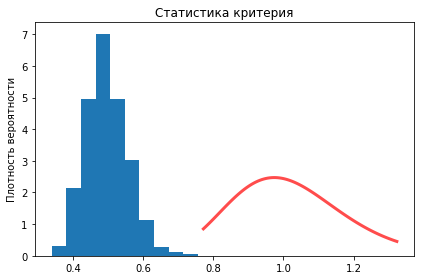

In [33]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 10, density=True)

# plot
# x = np.linspace(criterion_dist.ppf(0.005, 0.05, 0.1), criterion_dist.ppf(0.995, 0.05, 0.1), 100)
x = np.linspace(criterion_dist.ppf(0.05, len(sample1), len(sample2)), criterion_dist.ppf(0.95, len(sample1), len(sample2)), 100)
ax.plot(x, criterion_dist.pdf(x, len(sample1), len(sample2)), 'r-', lw=3, alpha=0.7, label="Theoretical")

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


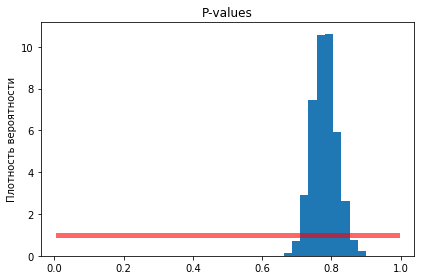

In [25]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 10, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()